In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
import h2o
from h2o.automl import H2OAutoML
from sklearn.metrics import mean_absolute_error

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [57]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: generate_datasets.ipynb
  File: generate_dataset_hgb.ipynb
  File: generate_dataset_gradboost.ipynb


In [58]:
# pv_measurement for all training and validation rows
a_targets = pd.read_parquet('../data/A/train_targets.parquet')
b_targets = pd.read_parquet('../data/B/train_targets.parquet')
c_targets = pd.read_parquet('../data/C/train_targets.parquet')

# validation sets
X_train_estimated_a = pd.read_parquet('../data/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../data/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../data/C/X_train_estimated.parquet')

# training sets
X_train_observed_a = pd.read_parquet('../data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../data/C/X_train_observed.parquet')

#test sets
X_test_estimated_a = pd.read_parquet('../data/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('../data/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('../data/C/X_test_estimated.parquet')

### Groups the rows with the same hour for location A

In [59]:
df = X_test_estimated_a.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

test_A = df


df = X_train_observed_a.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

training_A = df


df = X_train_estimated_a.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

validation_A = df

### Groups the rows with the same hour for location B

In [60]:
df = X_test_estimated_b.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

test_B = df


df = X_train_observed_b.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

training_B = df


df = X_train_estimated_b.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

validation_B = df

### Groups the rows with the same hour for location C

In [61]:
df = X_test_estimated_c.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

test_C = df


df = X_train_observed_c.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

training_C = df


df = X_train_estimated_c.copy()  # It's good practice to work with a copy to avoid modifying the original DataFrame unintentionally
# Assuming 'date_forecast' is a datetime column
df['hourly_timestamp'] = df['date_forecast'].dt.floor('H')
# Set the 'hourly_timestamp' as the index
df.set_index('hourly_timestamp', inplace=True)

# Group by 'hourly_timestamp' index, take the first value for 'date_forecast', and mean for all other columns
aggregations = {col: 'median' for col in df.columns if col != 'date_forecast'}
aggregations['date_forecast'] = 'first'

df = df.groupby('hourly_timestamp').agg(aggregations).reset_index()
# Drop the 'hourly_timestamp' column if you don't need it in the final DataFrame
df.drop(columns=['hourly_timestamp'], inplace=True)
df['date_forecast'] = df['date_forecast'].dt.floor('H')

validation_C = df

#### Merging the training and validation set with the targets sets such that pv_measurement is added

In [62]:
training_A = training_A.merge(a_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
training_A.drop('time', axis=1, inplace=True)

training_B = training_B.merge(b_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
training_B.drop('time', axis=1, inplace=True)

training_C = training_C.merge(c_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
training_C.drop('time', axis=1, inplace=True)

validation_A = validation_A.merge(a_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
validation_A.drop('time', axis=1, inplace=True)

validation_B = validation_B.merge(b_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
validation_B.drop('time', axis=1, inplace=True)

validation_C = validation_C.merge(c_targets[['time', 'pv_measurement']], how='inner', left_on='date_forecast', right_on='time')
validation_C.drop('time', axis=1, inplace=True)

Training B har 4 nan's for pv_m. Training C har 6000 nan's for pv_m

In [63]:
training_A['pv_measurement'] = training_A['pv_measurement'].replace(-0.0, 0.0)
training_B['pv_measurement'] = training_B['pv_measurement'].replace(-0.0, 0.0)
training_C['pv_measurement'] = training_C['pv_measurement'].replace(-0.0, 0.0)
validation_C['pv_measurement'] = validation_C['pv_measurement'].replace(-0.0, 0.0)
validation_A['pv_measurement'] = validation_A['pv_measurement'].replace(-0.0, 0.0)
validation_B['pv_measurement'] = validation_B['pv_measurement'].replace(-0.0, 0.0)

#### Plotting pv_measurement for all dataframes

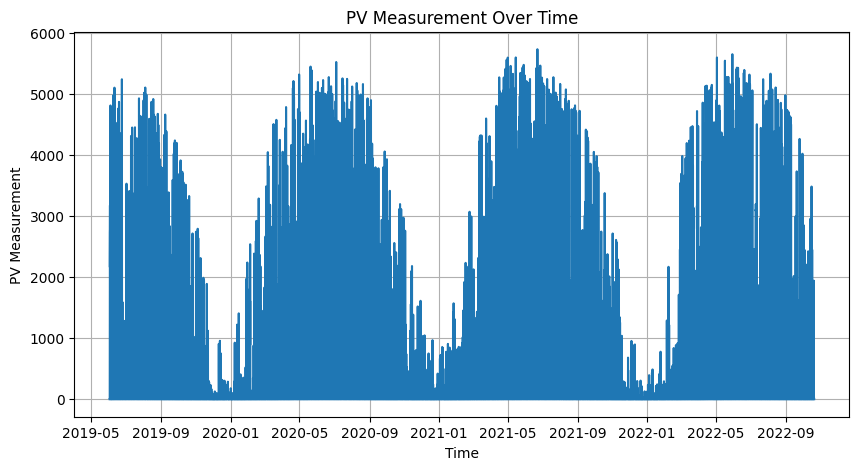

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(training_A['date_forecast'], training_A['pv_measurement'])
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time')
plt.grid(True)
plt.show()

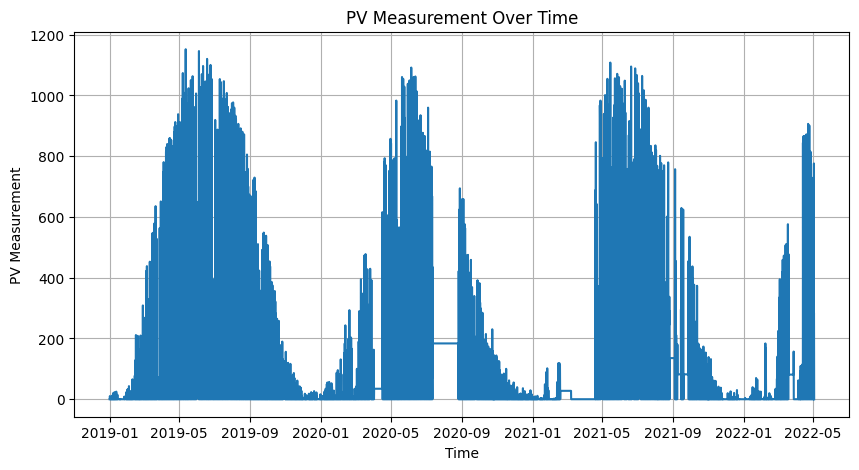

In [65]:
plt.figure(figsize=(10, 5))
plt.plot(training_B['date_forecast'], training_B['pv_measurement'])
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time')
plt.grid(True)
plt.show()

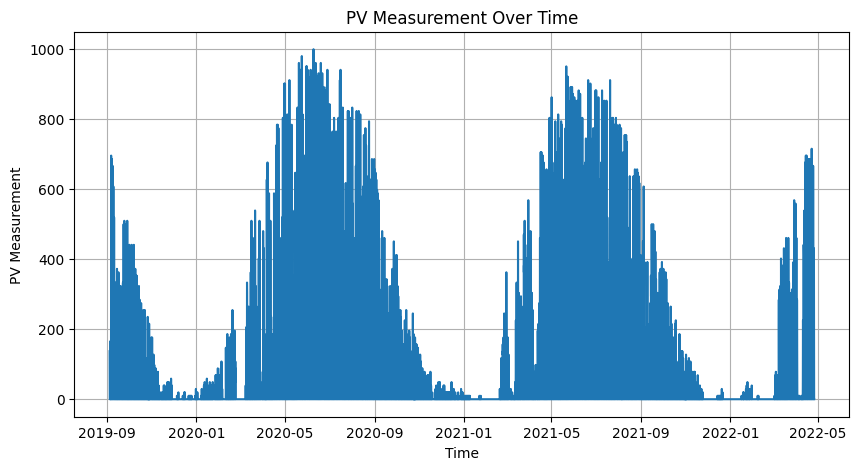

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(training_C['date_forecast'], training_C['pv_measurement'])
plt.xlabel('Time')
plt.ylabel('PV Measurement')
plt.title('PV Measurement Over Time')
plt.grid(True)
plt.show()

Her må vi sette inn verdier for 2019; gjennomsnitt av andre år med samme dato ellers

In [67]:
#training_C['pv_measurement'].fillna(1000, inplace=True)

In [68]:
training_C.dropna(subset=['pv_measurement'], inplace=True)
training_B.dropna(subset=['pv_measurement'], inplace=True)

In [69]:
nan_count = training_A.isna().sum()
#print(nan_count)

dataframes = [training_A, training_B, training_C, validation_A, validation_B, validation_C, test_A, test_B, test_C]

# Iterate through the DataFrames and remove the 'snow_density:kgm3' column
for df in dataframes:
    if 'snow_density:kgm3' in df.columns:
        df.drop(columns=['snow_density:kgm3'], inplace=True)
        df.drop(columns=['ceiling_height_agl:m'], inplace=True)
        df.drop(columns=['cloud_base_agl:m'], inplace=True)

### Trains HGB model for each location

### A

In [70]:
y_train = training_A['pv_measurement']

X_train = training_A.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_forecast'])

y_validate = validation_A['pv_measurement']

X_validate = validation_A.drop(columns=['pv_measurement'])
X_validate = X_validate.drop(columns=['date_forecast'])
X_validate = X_validate.drop(columns=['date_calc'])

In [71]:
# Initialize the model (using GradientBoostingRegressor in this example)
modelA = GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=1)

# Train the model
modelA.fit(X_train, y_train)

# Make predictions on the test set
y_pred = modelA.predict(X_validate)

# Calculate the mean absolute error
mae = mean_absolute_error(y_validate, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 125.59


In [72]:
feature_importances = modelA.feature_importances_

# Assuming you have a list of feature names in the same order as your data
feature_names = X_train.columns  # Replace with the actual feature names if needed

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df)

                           Feature    Importance
8                     direct_rad:W  7.803631e-01
6                    diffuse_rad:W  1.044939e-01
32                   sun_azimuth:d  2.204621e-02
3                  clear_sky_rad:W  2.038860e-02
33                 sun_elevation:d  8.744150e-03
2            clear_sky_energy_1h:J  6.012770e-03
39             wind_speed_u_10m:ms  5.701286e-03
35                     t_1000hPa:K  5.038255e-03
9                  direct_rad_1h:J  4.818294e-03
5                   dew_point_2m:K  3.844178e-03
36             total_cloud_cover:p  3.284010e-03
40             wind_speed_v_10m:ms  3.020440e-03
37                    visibility:m  2.997359e-03
7                 diffuse_rad_1h:J  2.958701e-03
20                  precip_5min:mm  2.807036e-03
38               wind_speed_10m:ms  2.592970e-03
10         effective_cloud_cover:p  2.559202e-03
1              air_density_2m:kgm3  2.355924e-03
0         absolute_humidity_2m:gm3  2.148973e-03
19                ms

In [73]:
selected_features_A = feature_importance_df[feature_importance_df['Importance'] > 0]

modelA.fit(X_train[selected_features_A['Feature']], y_train)

# Make predictions on the test set
y_pred = modelA.predict(X_validate[selected_features_A['Feature']])

# Calculate the mean absolute error
mae = mean_absolute_error(y_validate, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 125.26


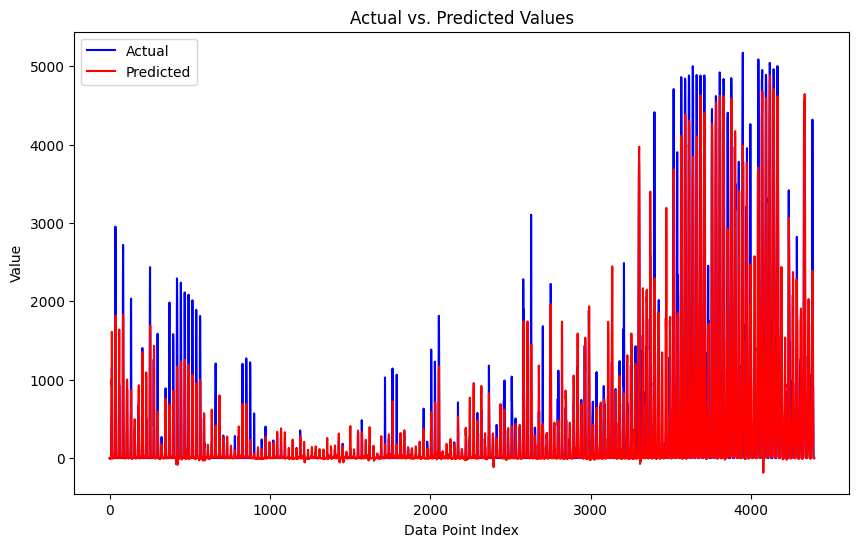

In [74]:
# Assuming y_validate and y_pred are NumPy arrays or pandas Series
plt.figure(figsize=(10, 6))

# Plot actual values in blue
plt.plot(y_validate, label='Actual', color='blue')

# Plot predicted values in red
plt.plot(y_pred, label='Predicted', color='red')

# Add labels, title, and legend
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()

plt.show()

#### B

In [75]:
y_train = training_B['pv_measurement']

X_train = training_B.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_forecast'])

y_validate = validation_B['pv_measurement']

X_validate = validation_B.drop(columns=['pv_measurement'])
X_validate = X_validate.drop(columns=['date_forecast'])
X_validate = X_validate.drop(columns=['date_calc'])

In [76]:
# Initialize the model (using GradientBoostingRegressor in this example)
modelB = GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=1)

# Train the model
modelB.fit(X_train, y_train)

# Make predictions on the test set
y_pred = modelB.predict(X_validate)

# Calculate the mean absolute error
mae = mean_absolute_error(y_validate, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 21.67


In [77]:
feature_importances = modelB.feature_importances_

# Assuming you have a list of feature names in the same order as your data
feature_names = X_train.columns  # Replace with the actual feature names if needed

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df)

                           Feature  Importance
33                 sun_elevation:d    0.675796
8                     direct_rad:W    0.148463
3                  clear_sky_rad:W    0.020179
6                    diffuse_rad:W    0.015723
32                   sun_azimuth:d    0.015081
35                     t_1000hPa:K    0.012193
9                  direct_rad_1h:J    0.011334
10         effective_cloud_cover:p    0.010804
5                   dew_point_2m:K    0.010348
37                    visibility:m    0.009452
26     relative_humidity_1000hPa:p    0.007970
2            clear_sky_energy_1h:J    0.007894
39             wind_speed_u_10m:ms    0.007449
1              air_density_2m:kgm3    0.005567
0         absolute_humidity_2m:gm3    0.005547
40             wind_speed_v_10m:ms    0.005403
19                msl_pressure:hPa    0.005213
7                 diffuse_rad_1h:J    0.004447
22               pressure_100m:hPa    0.004371
27                sfc_pressure:hPa    0.004075
36           

In [78]:
selected_features_B = feature_importance_df[feature_importance_df['Importance'] > 0]

modelB.fit(X_train[selected_features_B['Feature']], y_train)

# Make predictions on the test set
y_pred = modelB.predict(X_validate[selected_features_B['Feature']])

# Calculate the mean absolute error
mae = mean_absolute_error(y_validate, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 21.63


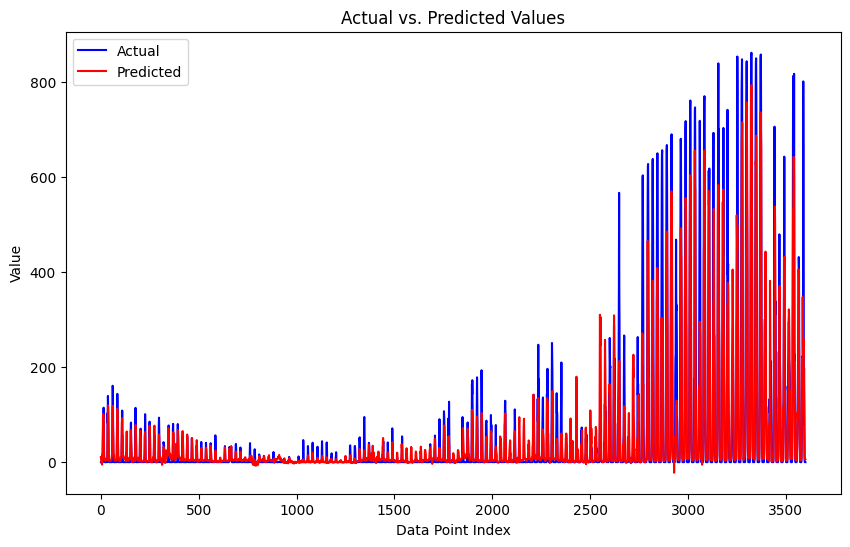

In [79]:
# Assuming y_validate and y_pred are NumPy arrays or pandas Series
plt.figure(figsize=(10, 6))

# Plot actual values in blue
plt.plot(y_validate, label='Actual', color='blue')

# Plot predicted values in red
plt.plot(y_pred, label='Predicted', color='red')

# Add labels, title, and legend
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()

plt.show()

#### C

In [80]:
y_train = training_C['pv_measurement']

X_train = training_C.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_forecast'])

y_validate = validation_C['pv_measurement']

X_validate = validation_C.drop(columns=['pv_measurement'])
X_validate = X_validate.drop(columns=['date_forecast'])
X_validate = X_validate.drop(columns=['date_calc'])

In [81]:
# Initialize the model (using GradientBoostingRegressor in this example)
modelC = GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=1)

# Train the model
modelC.fit(X_train, y_train)

# Make predictions on the test set
y_pred = modelC.predict(X_validate)

# Calculate the mean absolute error
mae = mean_absolute_error(y_validate, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 21.28


In [82]:
feature_importances = modelC.feature_importances_

# Assuming you have a list of feature names in the same order as your data
feature_names = X_train.columns  # Replace with the actual feature names if needed

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df)

                           Feature    Importance
33                 sun_elevation:d  5.290104e-01
8                     direct_rad:W  1.528236e-01
3                  clear_sky_rad:W  1.347200e-01
2            clear_sky_energy_1h:J  7.626784e-02
9                  direct_rad_1h:J  2.095152e-02
35                     t_1000hPa:K  1.298198e-02
10         effective_cloud_cover:p  7.370194e-03
26     relative_humidity_1000hPa:p  7.191362e-03
5                   dew_point_2m:K  5.746949e-03
37                    visibility:m  5.616947e-03
6                    diffuse_rad:W  5.274145e-03
39             wind_speed_u_10m:ms  4.770967e-03
23                pressure_50m:hPa  4.006590e-03
36             total_cloud_cover:p  3.884180e-03
7                 diffuse_rad_1h:J  3.003242e-03
27                sfc_pressure:hPa  2.857831e-03
22               pressure_100m:hPa  2.840882e-03
19                msl_pressure:hPa  2.469518e-03
1              air_density_2m:kgm3  2.154878e-03
40             wind_

In [83]:
selected_features_C = feature_importance_df[feature_importance_df['Importance'] > 0]

modelC.fit(X_train[selected_features_C['Feature']], y_train)

# Make predictions on the test set
y_pred = modelC.predict(X_validate[selected_features_C['Feature']])

# Calculate the mean absolute error
mae = mean_absolute_error(y_validate, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 21.25


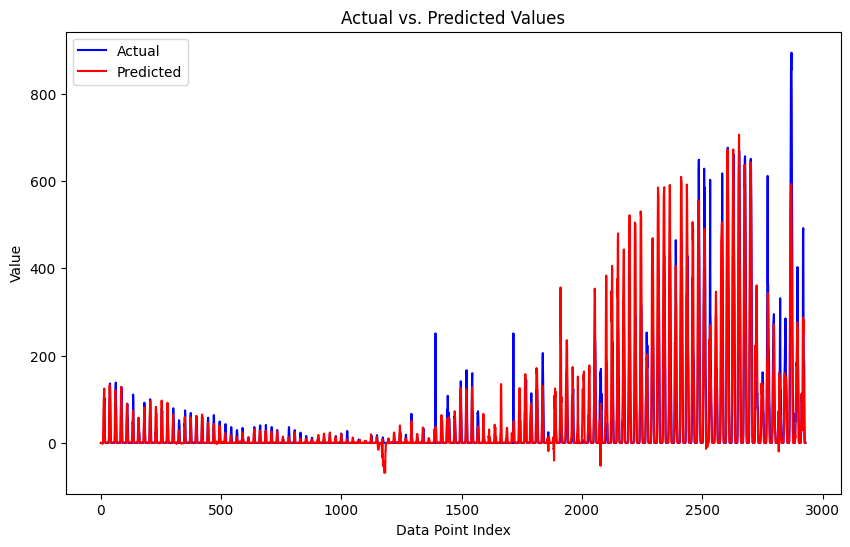

In [84]:
# Assuming y_validate and y_pred are NumPy arrays or pandas Series
plt.figure(figsize=(10, 6))

# Plot actual values in blue
plt.plot(y_validate, label='Actual', color='blue')

# Plot predicted values in red
plt.plot(y_pred, label='Predicted', color='red')

# Add labels, title, and legend
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()

plt.show()

### Testing

In [85]:
combined_A = pd.concat([training_A, validation_A], axis=0, ignore_index=True)
combined_A.dropna(subset=['pv_measurement'], inplace=True)

y_train = combined_A['pv_measurement']

X_train = combined_A.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_calc'])
X_train = X_train.drop(columns=['date_forecast'])

test_A = test_A.drop(columns=['date_forecast'])
test_A = test_A.drop(columns=['date_calc'])

modelA2 = GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=1)

# Train the model
modelA2.fit(X_train[selected_features_A['Feature']], y_train)

# Make predictions on the test set
y_pred_A = modelA2.predict(test_A[selected_features_A['Feature']])

In [86]:
combined_B = pd.concat([training_B, validation_B], axis=0, ignore_index=True)
combined_B.dropna(subset=['pv_measurement'], inplace=True)

y_train = combined_B['pv_measurement']

X_train = combined_B.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_calc'])
X_train = X_train.drop(columns=['date_forecast'])

test_B = test_B.drop(columns=['date_calc'])
test_B = test_B.drop(columns=['date_forecast'])

modelB2 = GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=1)

# Train the model
modelB2.fit(X_train[selected_features_B['Feature']], y_train)

# Make predictions on the test set
y_pred_B = modelB2.predict(test_B[selected_features_B['Feature']])

In [87]:
combined_C = pd.concat([training_C, validation_C], axis=0, ignore_index=True)
combined_C.dropna(subset=['pv_measurement'], inplace=True)

y_train = combined_C['pv_measurement']

X_train = combined_C.drop(columns=['pv_measurement'])
X_train = X_train.drop(columns=['date_calc'])
X_train = X_train.drop(columns=['date_forecast'])

test_C = test_C.drop(columns=['date_calc'])
test_C = test_C.drop(columns=['date_forecast'])

modelC2 = GradientBoostingRegressor(max_depth=5, n_estimators=100, random_state=1)

# Train the model
modelC2.fit(X_train[selected_features_C['Feature']], y_train)

# Make predictions on the test set
y_pred_C = modelC2.predict(test_C[selected_features_C['Feature']])

In [88]:
test_pred_all = np.concatenate((y_pred_A, y_pred_B, y_pred_C), axis=0)

test_pred_all2 = np.where(test_pred_all < 0, 0, test_pred_all)

In [89]:
test3 = pd.read_csv('../test.csv')
sample_submission = pd.read_csv('../sample_submission.csv')
test3['prediction'] = test_pred_all2
sample_submission = sample_submission[['id']].merge(test3[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('../Submissions/submission_30.csv', index=False)